In [5]:
import numpy as np
import os
import pandas as pd

In [6]:
filepath = "C://Users//huituo//Desktop//慧拓任务//数据标注//test_anno_2021-08-02-10-22-25_bag试标结果//试标结果//点云追踪结果//转换后结果数据//test_anno_2021-08-02-10-22-25_bag//"
files = os.listdir(filepath)
data = []
for file in files:
    with open(filepath+file, 'r') as f:
        for line in f.readlines():
            data.append(line.strip().split())

In [7]:
df = pd.DataFrame(data)
df = df.loc[:, [0, 11, 12, 13, 14]]
df.columns = ['type', 'x', 'y', 'z', 'heading']

In [8]:
for i in df.columns:
    if i == 'type': # 不包含type这一列
        continue
    else:
        df.loc[:, i] = df.loc[:, i].astype(float) # 字符串转float

In [9]:
df.describe()

,x,y,z,heading
count,26.000000,26.000000,26.000000,26.000000
mean,19.222366,16.100105,-0.189222,-0.873376
std,18.628832,1.934426,1.652529,3.032080
min,-8.275377,11.930110,-3.440390,-3.117637
25%,4.877859,15.319947,-1.282649,-3.098080
50%,15.170071,16.333777,-0.360639,-2.926056
75%,31.449948,17.631768,1.017277,3.214072
max,60.814330,18.814305,2.486212,3.232309


In [10]:
df[df.loc[:, 'type']=='Truck'].loc[:, ['z']]

,z
0,0.371659
1,0.353188
3,-0.679527
5,2.486212
6,-0.721728
8,2.028362
10,2.463320
11,1.664527
13,2.130120
14,1.112663


In [15]:
num_truck = df[df.loc[:, 'type']=='Truck'].shape[0]
num_auxiliary = df[df.loc[:, 'type']=='Auxiliary'].shape[0]
num_car = df[df.loc[:, 'type']=='Car'].shape[0]
print("Truck:{},Auxiliary:{},Car:{}, ".format(num_truck, num_auxiliary, num_car))

list_name = ['Truck','Auxiliary','Car','Excavator','Widebody','Pedestrian','Others']
nums_label = [df[df.loc[:, 'type']==name].shape[0] for name in list_name]
nums_label

Truck:16,Auxiliary:5,Car:5, 


[16, 5, 5, 0, 0, 0, 0]

<AxesSubplot:>

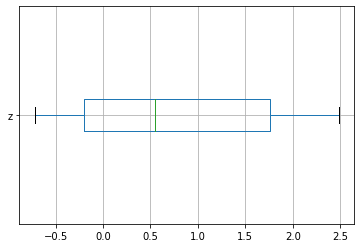

In [12]:
df[df.loc[:, 'type']=='Truck'].loc[:, ['z']].boxplot(vert=False)